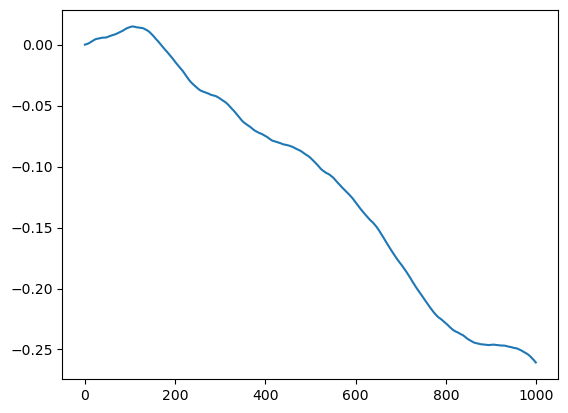

In [32]:
import jax.numpy as jnp
from jax import random, jit, vmap
from jax.scipy.stats import norm
import matplotlib.pyplot as plt

def sample_weiner(key, n, T):
    dt = T / n
    dW = jnp.sqrt(dt) * random.normal(key, (n,))
    W = jnp.cumsum(dW)
    return W


def integrate(f, a, b):
    dx = (b - a) / len(f)
    return jnp.cumsum(f) * dx

def integrate_p(f, a, b, p):
    for _ in range(p):
        f = integrate(f, a, b)
    return f

def squeeze(f):
    return 1/(1 + jnp.exp(-f))-1/2


def ito(f,w):
    dw = jnp.diff(w)
    return jnp.concatenate([jnp.array([0]), jnp.cumsum(f[:-1] * dw)])


T = 1.0
w = sample_weiner(random.PRNGKey(5), 1000, T)
#plt.plot(w)
#plt.plot(w)
#plt.plot(squeeze(w))
#plt.plot(integrate_p(squeeze(w), 0, T, 1))
#plt.plot(integrate(w, 0, 1.0))
#plt.plot(ito(squeeze(w), w))
plt.plot(integrate(w, 0, T))

